# Lets have M82 Galaxy or Cigar Galaxy fits Data from Astroquery

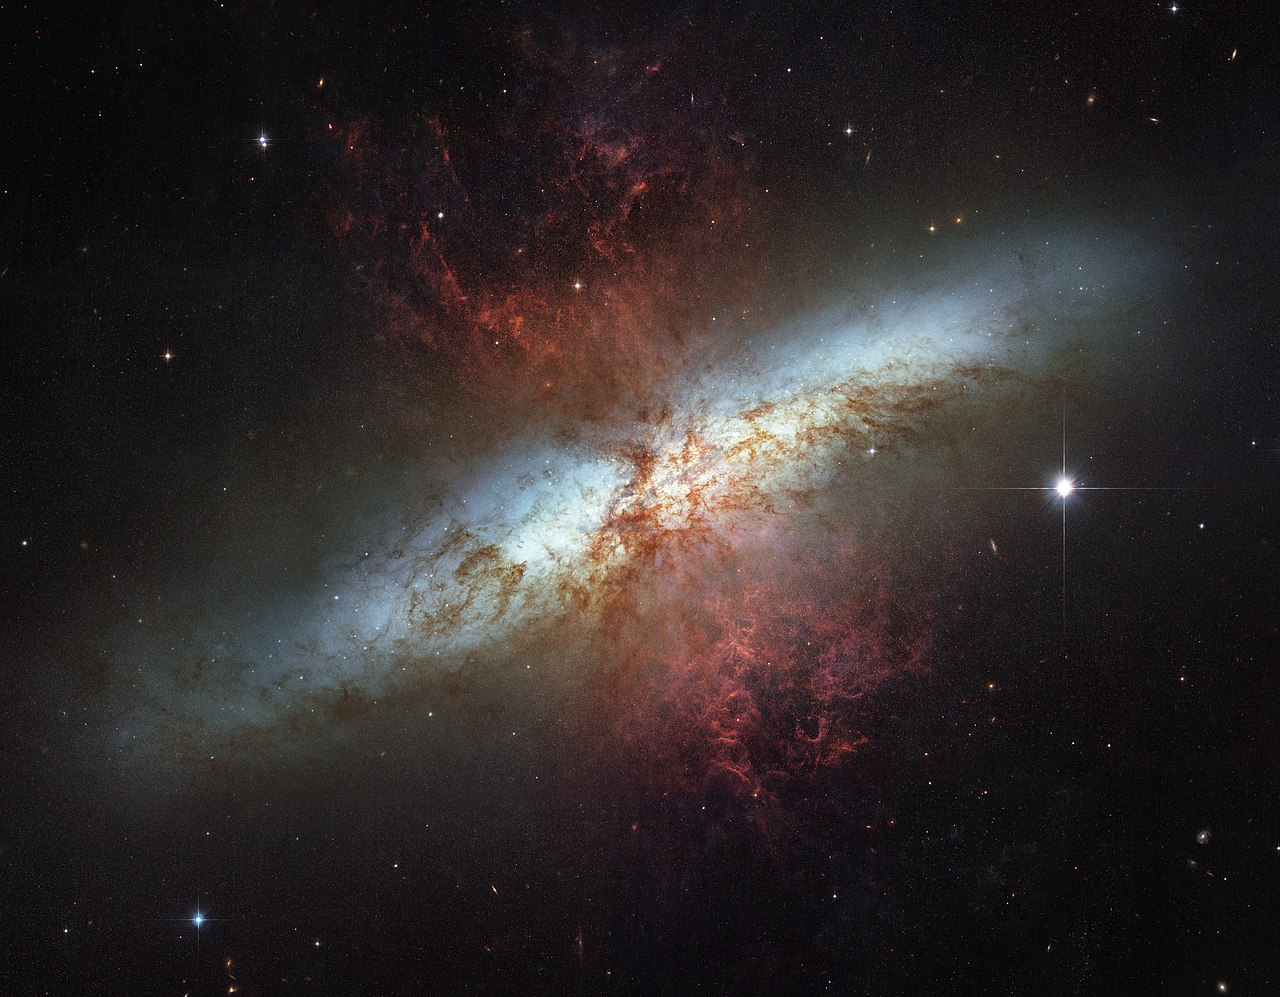

In [ ]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 24.8 MB/s eta 0:00:00


In [ ]:
# Importing necessary libraries and modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from astroquery.skyview import SkyView
import astropy.units as u
from astropy.io import fits

Query for Astronomical Survey Images centered on target name

SkyView Query Form: https://skyview.gsfc.nasa.gov/current/cgi/query.pl

In [ ]:
# Get the Black Eye Galaxy data(M64) from SDSSg Survey using SkyView
hdu = SkyView.get_images("M82", "SDSSg")[0][0]

In [ ]:
hdu

Get into the data

In [ ]:
# Get the Metadata using header
M82_header = hdu.header

In [ ]:
# Get the pixels data from HDU
M82_Pixels = hdu.data

In [ ]:
# Check the type - must be numpy array
type(M82_Pixels)

numpy.ndarray

In [ ]:
# Check the shape of the array
M82_Pixels.shape

(300, 300)

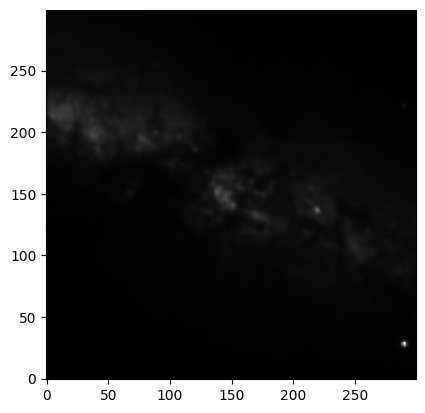

In [ ]:
# Plot the image
plt.imshow(M82_Pixels, cmap='gray', origin='lower')

In [ ]:
hdu = SkyView.get_images("M82", "DSS2 Blue",
                         pixels=600,
                         radius=(10)*u.arcmin)[0][0]

In [ ]:
M82_DSS2_Blue_Pixels = hdu.data

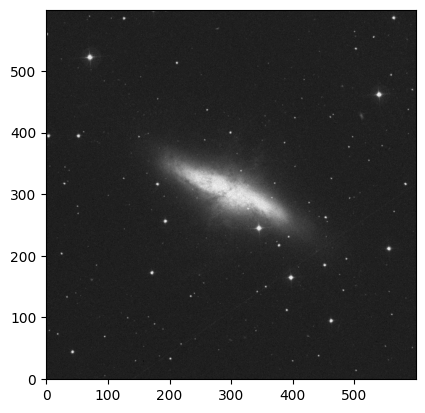

In [ ]:
plt.imshow(M82_DSS2_Blue_Pixels, cmap='gray', origin='lower')

In [ ]:
''' Steps to prepare data for FITS file '''

# 1. Create HDUList() to store different HDUs
hdulist = fits.HDUList()

# 2. Create the PrimaryHDU()
hdu1 = fits.PrimaryHDU()

# 3. Add Pixels data
hdu1.data = M82_Pixels

# 4. Add Meta data
hdu1.header = M82_header

# 5. Append this Primary HDU to the HDU List
hdulist.append(hdu1)

# 6. Generate the FITS data
hdulist.writeto('Dummy_FITS_file.fits')

In [ ]:
# Open the FITS data generated by you!
My_fits = fits.open('/content/Dummy_FITS_file.fits')

In [ ]:
# Starting by checking infor
My_fits

In [ ]:
# What's inside first index of our FITS data?
My_fits[0]

In [ ]:
# Check the header info
My_fits[0].header

SIMPLE  =                    T / Written by SkyView Tue Apr 23 15:12:22 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              148.968 / Reference longitude                            
CRVAL2  =              69.6797 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [ ]:
# Check the pixels using .data
My_fits[0].data

array([[0.1060791 , 0.1060791 , 0.14257812, ..., 0.3466797 , 0.36279297,
        0.3466797 ],
       [0.11828613, 0.18334961, 0.08972168, ..., 0.3383789 , 0.3544922 ,
        0.3466797 ],
       [0.11828613, 0.10595703, 0.10595703, ..., 0.38330078, 0.36279297,
        0.37109375],
       ...,
       [1.0683594 , 1.0117188 , 0.9707031 , ..., 0.13891602, 0.18359375,
        0.16748047],
       [1.0683594 , 1.0117188 , 0.9785156 , ..., 0.14697266, 0.1430664 ,
        0.13891602],
       [0.9658203 , 1.0351562 , 0.9785156 , ..., 0.17138672, 0.1430664 ,
        0.17138672]], dtype='>f4')

In [ ]:
# Store it in a variable
dummy_data_var = My_fits[0].data

In [ ]:
# Get the shape
dummy_data_var.shape

(300, 300)

In [ ]:
# Get the type of the variable
type(dummy_data_var)

numpy.ndarray

Pixel Scaling on M82 Data

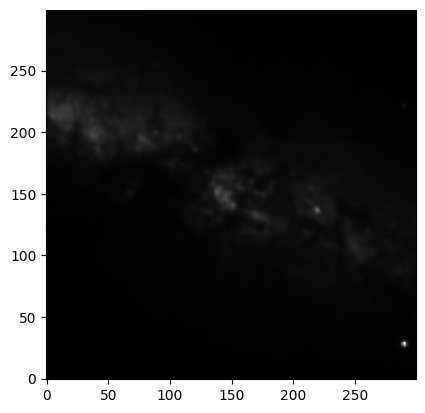

In [ ]:
plt.imshow(M82_Pixels, cmap='gray', origin='lower')

In [ ]:
# Printing the value of Pixel at the Center of Cigar Galaxy
M82_Pixels[151,151]

6.4375

In [ ]:
# Check some statistic (min, max, mean, std) of the data using numpy
print('Sumarray Statistics of M82 Pixels:-')
print(f'Minimum:- {np.min(M82_Pixels)}')
print(f'Maximum:- {np.max(M82_Pixels)}')
print(f'Average:- {np.mean(M82_Pixels)}')
print(f'Std:- {np.std(M82_Pixels)}')

Sumarray Statistics of M82 Pixels:-
Minimum:- 0.0897216796875
Maximum:- 46.3125
Average:- 1.4196388721466064
Std:- 1.5289520025253296


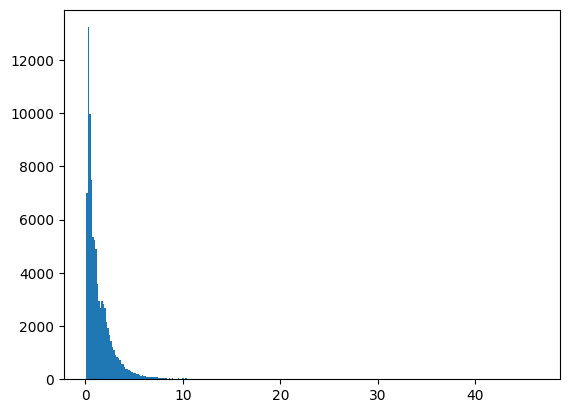

In [ ]:
# Get the histogram distribution
plt.hist(M82_Pixels.flat, bins=300)
plt.show()

Intensity Normalization of Linear Scaling or Min Max Scaling

In [ ]:
# A Common Function that will be used to plaot the scaled pixel arrays
def plot_pixels(pixel_array, title, color):
  plt.imshow(pixel_array, cmap='gray', origin='lower')
  plt.title(title, color=color, weight='bold')
  plt.axis('off')

In [ ]:
def compare_pixels(scaled_array, title):
  plt.subplot(1,2,1)
  plot_pixels(M82_Pixels, title='Original Image', color='black')
  plt.subplot(1,2,2)
  plot_pixels(scaled_array, title=title, color='royalblue')
  plt.tight_layout()
  plt.show()

In [ ]:
# Define a function to normalize
def minmax_scaling(pixel_array):
  num = pixel_array - np.min(pixel_array)
  den = np.max(pixel_array) - np.min(pixel_array)
  return num/den

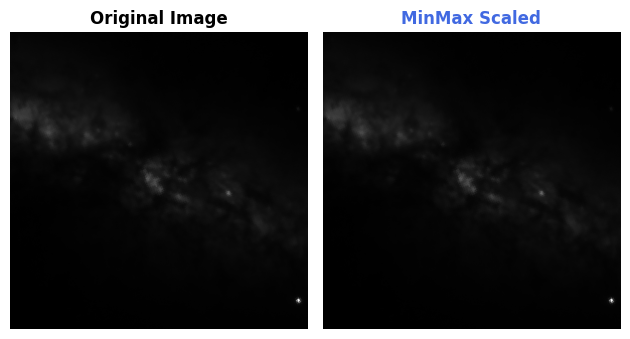

In [ ]:
# Normalize the M82 data and visualize it!
minmax_array = minmax_scaling(M82_Pixels)
compare_pixels(minmax_array, title='MinMax Scaled')

In [ ]:
# A function to standardize
def zscale(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  return num/den

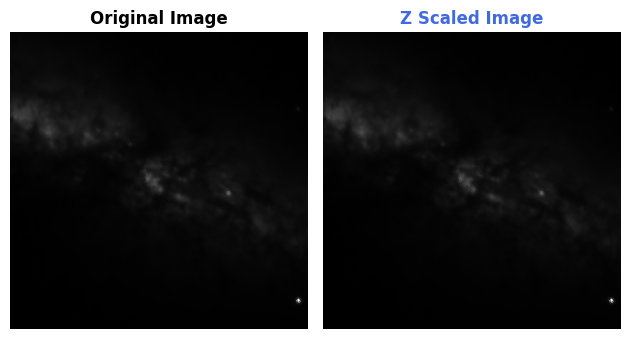

In [ ]:
# Visualize the standadized M82 data
zscaled_array = zscale(M82_Pixels)
compare_pixels(zscaled_array, title='Z Scaled Image')

Log Normalization

In [ ]:
# Log Normalization is simply the log of pixels! Create a function for the same
def log_normalization(pixel_array):
  return np.log(pixel_array)

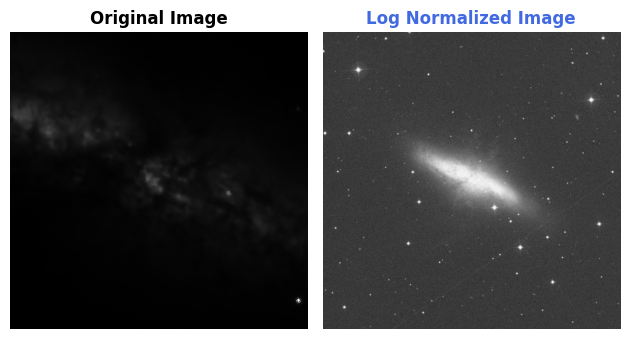

In [ ]:
# Visualize the log normalization on M82 data
log_norm_array = log_normalization(M82_DSS2_Blue_Pixels)
compare_pixels(log_norm_array, title='Log Normalized Image')

Create a Histogram Distribution of Pixels of the best output so far!

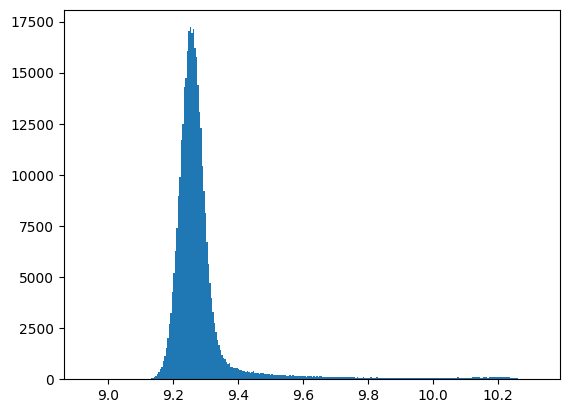

In [ ]:
# Let's proceed with this log normalization
plt.hist(log_norm_array.flat, bins=300)
plt.show()

In [ ]:
# Get the shape
log_norm_array.shape

(600, 600)

Square Root

In [ ]:
def sqrt_scaling(pixel_array):
  return np.sqrt(pixel_array)

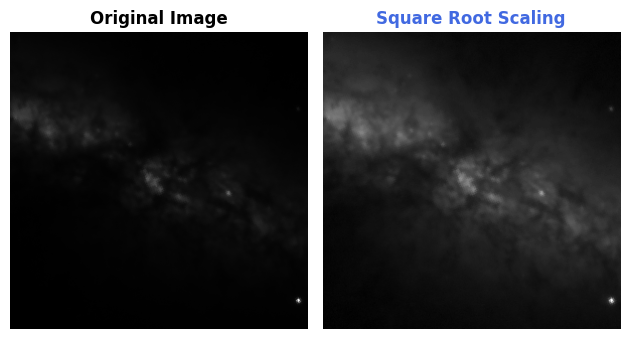

In [ ]:
sqrt_array = sqrt_scaling(M82_Pixels)
compare_pixels(sqrt_array, title='Square Root Scaling')

astropy.visualization Modules

ZScaleInterval

In [ ]:
# Get the ZScaleInterval from visualization module of astropy
from astropy.visualization import ZScaleInterval

In [ ]:
# Creat the object for ZScaleInterval
z = ZScaleInterval()

In [ ]:
# Get min and max values of the M82 data
z1, z2 = z.get_limits(log_norm_array)

In [ ]:
# Check z1 and z2
print(f'Minimum = {z1}')
print(f'Maximum = {z2}')

Minimum = 9.152816772460938
Maximum = 9.497337102930224


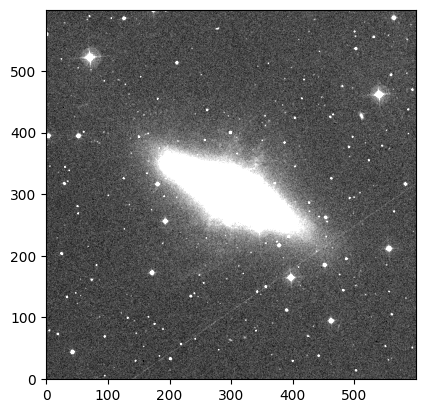

In [ ]:
# Plot the M82 data using this interval
img = plt.imshow(log_norm_array, vmin=z1, vmax=z2, cmap='gray', origin='lower')
plt.show()

In [ ]:
# Get the array created from the aabove cell
image_array = img.make_image(renderer=None, unsampled=True)[0]

In [ ]:
# Shape - check the channels
image_array.shape

(600, 600, 4)

Note:-

- Red, Green, Blue and Alpha channels makes up a 4 channel image

Change 4 channel image to grayscale

In [ ]:
# Import cv2 library - doesn't need installation using google colab
import cv2

In [ ]:
# Convert 4 channel image to grayscale image
gray_array = cv2.cvtColor(image_array, cv2.COLOR_BGRA2GRAY)

In [ ]:
# Check if channels are set to 3 or 4 now
gray_array.shape

(600, 600)

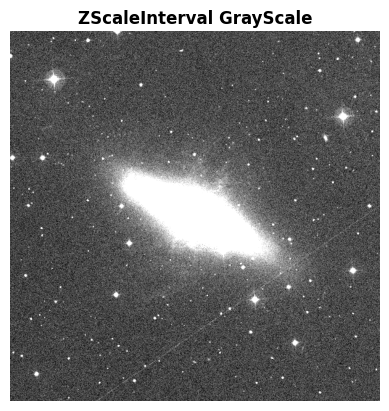

In [ ]:
# Visualize it
plot_pixels(gray_array, title='ZScaleInterval GrayScale', color='black')

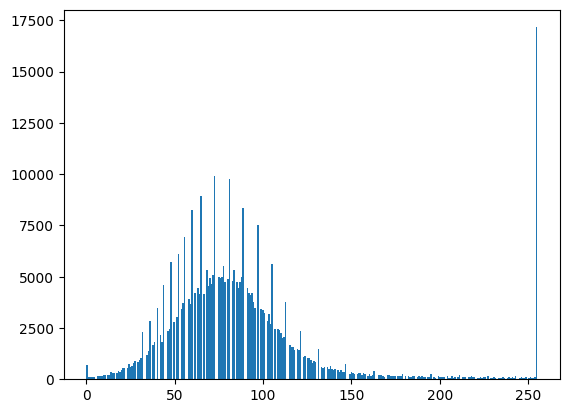

In [ ]:
# Histogram Visualization
plt.hist(gray_array.flat, bins=300)
plt.show()

In [ ]:
# Store grayscale in a new variable (will be using it later)
grayscale_zint_array = gray_array